In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get the data

In [118]:
dt=pd.read_csv("knndt.csv")
dt.head()

,",WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS"
0,"0,0.9139173265804122,1.162072707738686,0.56794..."
1,"1,0.6356319040582334,1.0037216291809468,0.5353..."
2,"2,0.7213598079583814,1.2014926236186863,0.9219..."
3,"3,1.2342044015229892,1.3867262910227907,0.6530..."
4,"4,1.2794908243775642,0.9497495573001323,0.6272..."


In [119]:
cls=dt.columns
col=[i.split(",") for i in cls]
col

[['',
  'WTT',
  'PTI',
  'EQW',
  'SBI',
  'LQE',
  'QWG',
  'FDJ',
  'PJF',
  'HQE',
  'NXJ',
  'TARGET CLASS']]

In [120]:
for i in col:
    val=i
val

['',
 'WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ',
 'TARGET CLASS']

In [121]:
lst=list(dt.iloc[:,0])
lst[:5]

['0,0.9139173265804122,1.162072707738686,0.5679458536608835,0.7554638959888053,0.7808615715474211,0.3526077229335367,0.7596969140337959,0.6437975644205896,0.8794220913503251,1.2314094373345865,1',
 '1,0.6356319040582334,1.0037216291809468,0.5353423517706737,0.8256448459795241,0.9241089292160148,0.6484502366838869,0.6753343122306434,1.0135459920525625,0.621552215350488,1.4927016046356893,0',
 '2,0.7213598079583814,1.2014926236186863,0.921989733476548,0.8555949834078469,1.5266293883585085,0.720780887111782,1.626350711360958,1.1544831470276795,0.9578770228983207,1.2855967931952772,0',
 '3,1.2342044015229892,1.3867262910227907,0.6530463056350606,0.8256244452701601,1.142503540047211,0.8751279212294097,1.4097080602602086,1.3800025459668137,1.5226920462447513,1.1530930248076359,1',
 '4,1.2794908243775642,0.9497495573001323,0.6272800413029391,0.6689760819458959,1.2325373035658138,0.703727439100354,1.1155955027340818,0.6466906982053768,1.4638117509917998,1.4191665765843762,1']

In [122]:
dt=pd.DataFrame([i.split(",") for i in lst],columns=val)
dt.drop("",axis=1,inplace=True)
dt.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.9139173265804122,1.162072707738686,0.5679458536608835,0.7554638959888053,0.7808615715474211,0.3526077229335367,0.7596969140337959,0.6437975644205896,0.8794220913503251,1.2314094373345865,1
1,0.6356319040582334,1.0037216291809468,0.5353423517706737,0.8256448459795241,0.9241089292160148,0.6484502366838869,0.6753343122306434,1.0135459920525625,0.621552215350488,1.4927016046356893,0
2,0.7213598079583814,1.2014926236186863,0.921989733476548,0.8555949834078469,1.5266293883585085,0.720780887111782,1.626350711360958,1.1544831470276795,0.9578770228983207,1.2855967931952772,0
3,1.2342044015229892,1.3867262910227907,0.6530463056350606,0.8256244452701601,1.142503540047211,0.8751279212294097,1.4097080602602086,1.3800025459668137,1.5226920462447513,1.1530930248076359,1
4,1.2794908243775642,0.9497495573001323,0.6272800413029391,0.6689760819458959,1.2325373035658138,0.703727439100354,1.1155955027340818,0.6466906982053768,1.4638117509917998,1.4191665765843762,1


In [123]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   WTT           1000 non-null   object
 1   PTI           1000 non-null   object
 2   EQW           1000 non-null   object
 3   SBI           1000 non-null   object
 4   LQE           1000 non-null   object
 5   QWG           1000 non-null   object
 6   FDJ           1000 non-null   object
 7   PJF           1000 non-null   object
 8   HQE           1000 non-null   object
 9   NXJ           1000 non-null   object
 10  TARGET CLASS  1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


In [124]:
df=dt.copy()
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.9139173265804122,1.162072707738686,0.5679458536608835,0.7554638959888053,0.7808615715474211,0.3526077229335367,0.7596969140337959,0.6437975644205896,0.8794220913503251,1.2314094373345865,1
1,0.6356319040582334,1.0037216291809468,0.5353423517706737,0.8256448459795241,0.9241089292160148,0.6484502366838869,0.6753343122306434,1.0135459920525625,0.621552215350488,1.4927016046356893,0
2,0.7213598079583814,1.2014926236186863,0.921989733476548,0.8555949834078469,1.5266293883585085,0.720780887111782,1.626350711360958,1.1544831470276795,0.9578770228983207,1.2855967931952772,0
3,1.2342044015229892,1.3867262910227907,0.6530463056350606,0.8256244452701601,1.142503540047211,0.8751279212294097,1.4097080602602086,1.3800025459668137,1.5226920462447513,1.1530930248076359,1
4,1.2794908243775642,0.9497495573001323,0.6272800413029391,0.6689760819458959,1.2325373035658138,0.703727439100354,1.1155955027340818,0.6466906982053768,1.4638117509917998,1.4191665765843762,1


In [125]:
df["TARGET CLASS"]=df['TARGET CLASS'].astype(int)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.9139173265804122,1.162072707738686,0.5679458536608835,0.7554638959888053,0.7808615715474211,0.3526077229335367,0.7596969140337959,0.6437975644205896,0.8794220913503251,1.2314094373345865,1
1,0.6356319040582334,1.0037216291809468,0.5353423517706737,0.8256448459795241,0.9241089292160148,0.6484502366838869,0.6753343122306434,1.0135459920525625,0.621552215350488,1.4927016046356893,0
2,0.7213598079583814,1.2014926236186863,0.921989733476548,0.8555949834078469,1.5266293883585085,0.720780887111782,1.626350711360958,1.1544831470276795,0.9578770228983207,1.2855967931952772,0
3,1.2342044015229892,1.3867262910227907,0.6530463056350606,0.8256244452701601,1.142503540047211,0.8751279212294097,1.4097080602602086,1.3800025459668137,1.5226920462447513,1.1530930248076359,1
4,1.2794908243775642,0.9497495573001323,0.6272800413029391,0.6689760819458959,1.2325373035658138,0.703727439100354,1.1155955027340818,0.6466906982053768,1.4638117509917998,1.4191665765843762,1


In [126]:
colss=[i for i in dt.columns if i !="TARGET CLASS"]
colss

['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']

In [127]:
for i in colss:
    df[i]=df[i].astype(float)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int32  
dtypes: float64(10), int32(1)
memory usage: 82.2 KB


# Standardize the Variables

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [129]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.8)
print(df_train.shape)
print(df_test.shape)

(800, 11)
(200, 11)


In [130]:
X_scale=scaler.fit_transform(df_train[colss])
X_scale

array([[ 2.37062926, -1.14548224, -0.6423846 , ..., -0.59428933,
         0.33516834,  0.02468867],
       [ 1.23828579,  0.69015675,  0.4496056 , ..., -2.2653985 ,
         1.13473327, -1.84134666],
       [ 1.43285547,  0.25919658, -1.86874443, ..., -1.44196819,
         0.05388522, -0.74989858],
       ...,
       [ 0.90038039, -0.90832722, -0.37260388, ..., -0.0055335 ,
        -0.19291818,  0.2476514 ],
       [ 1.57562091, -0.62863009, -1.71060653, ..., -1.03553083,
        -0.70718052, -1.14516484],
       [ 0.52756928,  1.60242868,  0.6396869 , ...,  1.2626117 ,
         0.31313778, -0.93282594]])

In [131]:
X_train=pd.DataFrame(X_scale)
X_train.columns=colss
X_train.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,2.370629,-1.145482,-0.642385,-0.696698,-0.340347,0.498953,0.459669,-0.594289,0.335168,0.024689
1,1.238286,0.690157,0.449606,-0.424294,-1.016265,-0.120684,-0.480410,-2.265398,1.134733,-1.841347
2,1.432855,0.259197,-1.868744,0.293659,0.605777,-0.271616,-0.711043,-1.441968,0.053885,-0.749899
3,1.198829,-0.987621,0.621311,-0.885191,0.935828,0.089794,0.323488,-1.152311,1.808220,-1.094752
4,-1.804443,-0.812177,-0.663424,-0.760776,0.454025,-0.020582,-1.407413,0.090137,0.029056,-0.375852


In [132]:
label=df_train["TARGET CLASS"].reset_index()
label.head()

,index,TARGET CLASS
0,483,1
1,713,1
2,141,1
3,38,1
4,869,0


In [93]:
X_train=pd.concat([X_train,label["TARGET CLASS"]],axis=1)
X_train

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,-0.796560,1.446439,0.670793,0.483700,2.511935,0.124828,1.045097,-0.876702,-1.759980,-0.972400,0
1,0.832617,-1.082340,-1.621416,-1.284010,-0.284238,0.227988,-0.304664,0.044579,0.474279,-0.763126,1
2,-0.695300,0.469437,-1.916384,0.123880,-0.742987,-0.347279,0.251585,-0.429192,-0.574864,0.574141,1
3,1.542483,0.849843,0.231197,-0.582530,2.268068,0.743384,0.236936,-1.513279,-0.313706,-0.975120,1
4,-0.789790,0.560568,0.546181,-1.050543,-0.512071,0.234968,-0.251896,1.613418,-0.262294,0.497705,0
...,...,...,...,...,...,...,...,...,...,...,...
795,-0.086227,-0.360173,-0.775926,-0.057754,1.203406,0.752792,-1.352714,-0.546907,0.474995,1.194974,1
796,0.823250,0.744734,0.351062,0.961480,-0.166896,0.329796,-0.122732,-1.149192,1.566533,1.384459,1
797,-1.597377,-1.310859,2.297768,2.098703,0.457704,2.090601,-0.534254,0.223885,-1.739016,-1.833335,0
798,1.522603,1.234228,-0.702067,0.215577,0.088513,-0.813463,-1.758591,0.187753,-0.670849,-0.108155,1


In [95]:

y_train=X_train["TARGET CLASS"]
X_train=X_train[colss]

## For Test data

In [83]:
tst_scale=scaler.transform(df_test[colss])
X_test=pd.DataFrame(tst_scale)
X_test.columns=colss
X_test.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.166233,0.353264,-0.295589,-1.132631,0.616846,0.803706,-0.713707,1.265456,0.415713,0.301461
1,-0.795570,-1.343629,1.910209,0.344629,0.142397,1.052059,2.422151,0.945654,-1.805692,-1.058051
2,-0.477061,-0.999960,1.065767,1.438807,-0.146553,-0.969455,-1.239292,0.015708,2.301076,-0.999360
3,0.564586,-0.909031,-1.108344,-1.285136,0.930286,1.848880,-0.217550,0.040544,0.059925,-0.485010
4,-0.796560,1.446439,0.670793,0.483700,2.511935,0.124828,1.045097,-0.876702,-1.759980,-0.972400


In [84]:
tst_label=df_test["TARGET CLASS"].reset_index()
tst_label.head()

,index,TARGET CLASS
0,101,0
1,219,0
2,842,1
3,603,1
4,942,0


In [85]:
X_test=pd.concat([X_test,tst_label["TARGET CLASS"]],axis=1)
X_test

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.166233,0.353264,-0.295589,-1.132631,0.616846,0.803706,-0.713707,1.265456,0.415713,0.301461,0
1,-0.795570,-1.343629,1.910209,0.344629,0.142397,1.052059,2.422151,0.945654,-1.805692,-1.058051,0
2,-0.477061,-0.999960,1.065767,1.438807,-0.146553,-0.969455,-1.239292,0.015708,2.301076,-0.999360,1
3,0.564586,-0.909031,-1.108344,-1.285136,0.930286,1.848880,-0.217550,0.040544,0.059925,-0.485010,1
4,-0.796560,1.446439,0.670793,0.483700,2.511935,0.124828,1.045097,-0.876702,-1.759980,-0.972400,0
...,...,...,...,...,...,...,...,...,...,...,...
195,0.492209,-0.799125,-1.451144,-0.227703,-1.305501,-0.363756,-0.269696,0.206180,0.760315,0.553176,1
196,-0.681214,0.431318,-1.376035,-0.023931,-0.749443,-0.013237,0.450152,-0.404950,1.519233,-0.431094,1
197,-0.706631,-0.735778,2.291567,0.020265,-0.002510,-0.805572,-0.402918,-0.581077,-1.545044,1.331454,0
198,-1.759869,0.057211,2.597419,1.047686,1.488075,0.596072,0.041652,-0.815445,-0.946490,-0.023760,0


In [86]:
X_test.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [96]:
y_test=X_test["TARGET CLASS"]
X_test=X_test[colss]

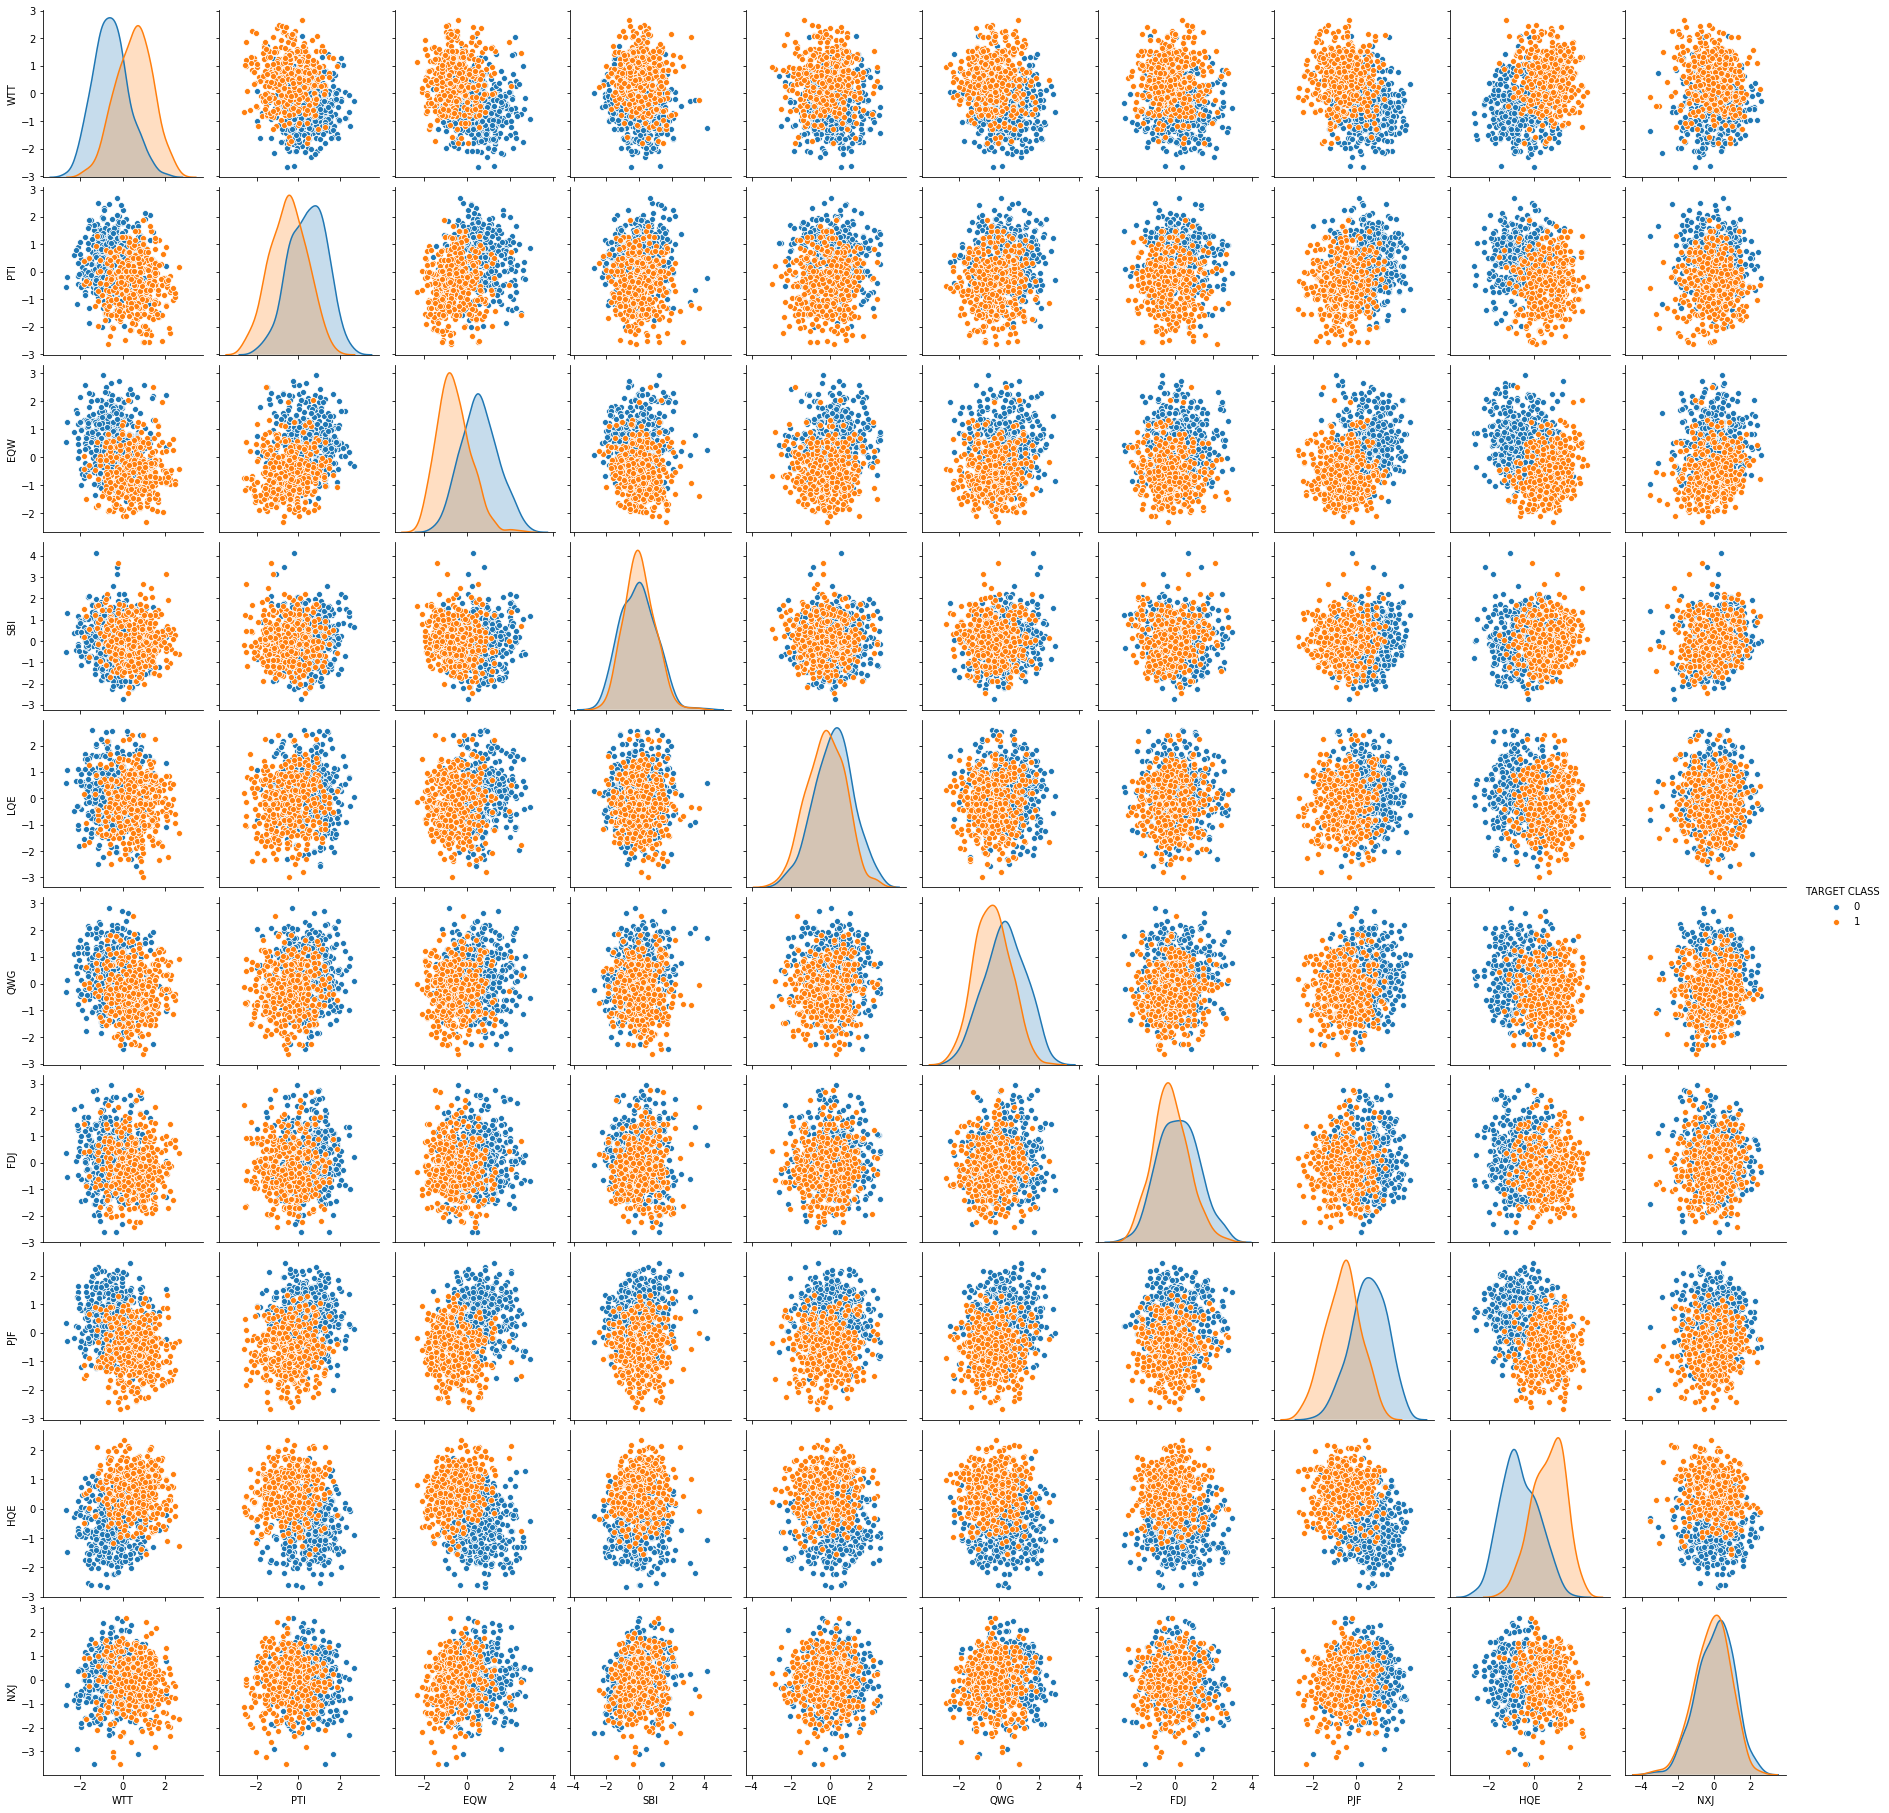

In [87]:
import seaborn as sns
sns.pairplot(X_train,hue="TARGET CLASS")

# Applying KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [98]:
y_pred=knn.predict(X_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [101]:
print(confusion_matrix(y_test,y_pred))

[[ 82   4]
 [  2 112]]


In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        86
           1       0.97      0.98      0.97       114

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



# Chossing K

In [106]:
acc_score=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    acc_score.append(score.mean())

In [107]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    error_rate.append(1-score.mean())

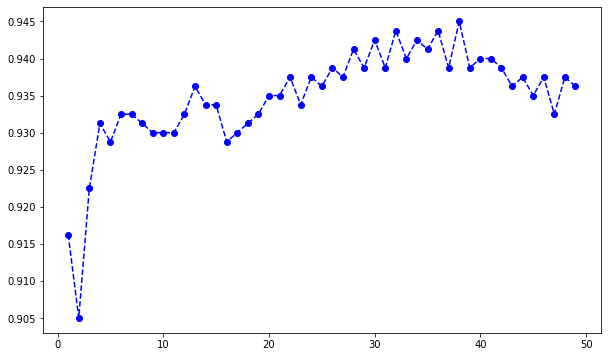

In [113]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc_score,color="blue",linestyle="dashed",marker="o")

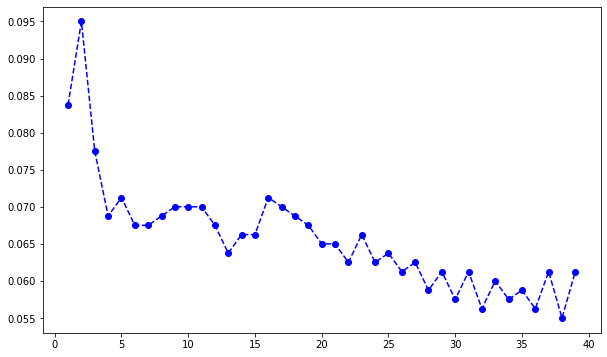

In [115]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle="dashed",marker="o")

In [117]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[ 75  11]
 [  6 108]]


              precision    recall  f1-score   support

           0       0.93      0.87      0.90        86
           1       0.91      0.95      0.93       114

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200

